In [56]:
import pandas as pd
import numpy as np
filename="F:\API_project\Project_challenge-machine-learning-api-deployment\preprocessing\data_cleaned.csv"
df = pd.read_csv(filename)
df.head(20)

,Unnamed: 0,Title,Location,Price,Area,Number_of_Rooms,Furnished,Kitchen type,Status,Garden surface,Swimming Pool,AreaFrom,AreaTo
0,1,House for sale,Lembergsesteenweg 67 Box lot 2,419000,188.0,3,No,Hyper equipped,As new,330,No,188,NaN
1,2,House for sale,Lembergsesteenweg 67 Box lot 1,459000,164.0,3,No,Hyper equipped,As new,341,No,164,NaN
2,3,House for sale,Ruelle Hierby 17,149000,134.0,2,No,Installed,Good,300,No,134,NaN
3,4,House for sale,Rue Petite Voie 176,149000,198.0,5,No,Semi equipped,To be done up,147,No,198,NaN
4,5,House for sale,Rue Pierre Curie 107,149000,80.0,2,No,Not installed,Good,147,No,80,NaN
5,6,House for sale,Blauwesteen 187,159000,155.0,2,No,Semi equipped,To renovate,50,No,155,NaN
6,7,House for sale,Rue de L'Eglise 18,219000,278.0,5,No,Not installed,To renovate,1092,No,278,NaN
7,8,House for sale,Kruisstraat 91,139000,112.0,3,No,Installed,To be done up,23,No,112,NaN
8,9,House for sale,Stooktstraat 70,239000,150.0,3,No,Hyper equipped,Just renovated,250,No,150,NaN
9,10,Quartier du Bailou - Maisons,4837 — Baelen,295000,212.0,3,No,Hyper equipped,Just renovated,250,No,188,236.0


### Defining  and Selecting Variables

In [57]:
df1 = df[df['Status'].str.contains('As new')==True]
df2 = df[df['Status'].str.contains('Good')==True]
df3 = df[df['Status'].str.contains('Just renovated')==True]

df4 = df[df['Status'].str.contains('To be done up')==True]
df5 = df[df['Status'].str.contains('To renovate')==True]
df6 = df[df['Status'].str.contains('To restore')==True]

In [58]:
df_m1 = pd.concat([df1,df3]) #Model1 dataframe
df_m2 = pd.concat([df2,df4,df5,df6]) #Model2 dataframe
print(len(df_m1))
print(len(df_m2))

2151
5207


In [59]:
X_features_all = pd.concat([df.iloc[:,4:6], df.iloc[:,9]], axis=1) # Features based on all dataframe
y_target_all = df.iloc[:,3]
(X_features_all.head())
#print(len(X_features_m1))

,Area,Number_of_Rooms,Garden surface
0,188.0,3,330
1,164.0,3,341
2,134.0,2,300
3,198.0,5,147
4,80.0,2,147


In [65]:
X_features_m1 = pd.concat([df_m1.iloc[:,4:6], df_m1.iloc[:,9]], axis=1)
y_target_m1 = df_m1.iloc[:,3]
(X_features_m1.head())
print((X_features_m1.shape))
(X_features_m1.head())


(2151, 3)


,Area,Number_of_Rooms,Garden surface
0,188.0,3,330
1,164.0,3,341
13,165.0,3,50
27,210.0,4,1170
45,140.0,3,485


In [62]:
X_features_m2 = pd.concat([df_m2.iloc[:,4:6], df_m2.iloc[:,9]], axis=1)
y_target_m2 = df_m2.iloc[:,3]
(X_features_m2.head())
print(len(X_features_m2))

5207


### Split the dataset

In [67]:
import sklearn
import numpy as np
from sklearn import datasets
from sklearn. model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features_m1, y_target_m1, test_size=0.2, random_state=42)

##  Load and fit the model (with Sklearn)_multilinear regression

In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression

# Choose your test size to split between training and testing sets:
print(X_train.shape)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(y_test)
print(X_test)

### Correlation Coefficients

In [36]:
from sklearn.metrics import r2_score
import scipy as sc
y_pred = regressor.predict(X_train)


print(sc.stats.spearmanr(y_train.T, y_pred.T))
print(sc.stats.pearsonr(y_train.T, y_pred.T))
#r2_score(y_train, y_pred)

SpearmanrResult(correlation=0.588026921376499, pvalue=0.0)
(0.5924821375262639, 0.0)


In [37]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)

print(sc.stats.pearsonr(y_test.T, y_pred.T))

(0.6234263489431493, 2.9160224918415724e-113)


### Decsion Tree

In [38]:
# DecsionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X_train, y_train)
yy = clf.predict(X_train)
print(sc.stats.spearmanr(y_train.T, yy.T))

y_pred_test_pipe = clf.predict(X_test)


print(sc.stats.spearmanr(y_test, y_pred_test_pipe))
print(sc.stats.pearsonr(y_test, y_pred_test_pipe))

SpearmanrResult(correlation=0.587557542780134, pvalue=0.0)
SpearmanrResult(correlation=0.6017047406105008, pvalue=1.2669379853228565e-103)
(0.6283634744276858, 1.4680409597747837e-115)


In [39]:
#scaler
#from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler()  
# Don't cheat - fit only on training data
#scaler.fit(X_train)  
#X_train = scaler.transform(X_train)  
# apply same transformation to test data
#X_test = scaler.transform(X_test)  

### Gradient Boost/Final Model

In [68]:
# GradientBoostingRegressor
import scipy as sc
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', RidgeCV()), ('lasso', LassoCV(random_state=42)),('knr', KNeighborsRegressor(n_neighbors=20, metric='euclidean'))]

final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,random_state=42)
reg = StackingRegressor(estimators=estimators,final_estimator=final_estimator)

reg = reg.fit(X_train, y_train)
y_pred_test_pipe = reg.predict(X_test)


print(sc.stats.spearmanr(y_test, y_pred_test_pipe))
print(sc.stats.pearsonr(y_test, y_pred_test_pipe))

SpearmanrResult(correlation=0.6816177210914096, pvalue=3.5628760755651515e-60)
(0.6935932319354474, 4.3035230538327733e-63)


In [49]:
import pickle
pickle.dump(reg, open('model2.pkl','wb'))

### polynomial

In [50]:
degree = 5

In [51]:
#polynomial
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# define the pipeline
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures(degree=degree, include_bias=True)),
    ('estimator', Ridge(alpha=1))
])


In [52]:
import scipy as sc
pipe.fit(X_train, y_train)
y_pred_train_pipe = pipe.predict(X_train)

print(sc.stats.spearmanr(y_train.T, y_pred_train_pipe.T))
print(sc.stats.pearsonr(y_train.T, y_pred_train_pipe.T))

SpearmanrResult(correlation=0.6007256967698125, pvalue=0.0)
(0.6397829559981205, 0.0)


In [ ]:

y_pred_test_pipe = pipe.predict(X_test)


print(sc.stats.spearmanr(y_test.T, y_pred_test_pipe.T))
print(sc.stats.pearsonr(y_test.T, y_pred_test_pipe.T))

### Scatter plot

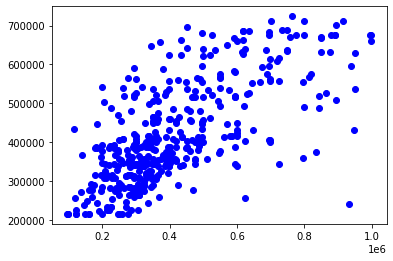

In [69]:
import matplotlib.pyplot as plt
ax = plt.gca()

plt.scatter(y_test, y_pred_test_pipe, color="blue")
#plt.plot(predictions)

#plt.ylim([-1, 1000000])
plt.show()